### https://www.kaggle.com/chadalee/text-analytics-on-russian-troll-tweets-part-1

#### Dataset--->> https://www.kaggle.com/fivethirtyeight/russian-troll-tweets

### Problem Statements :--

    1..What are the most trending hashtags?
    2..When were people most tweeting? Are tweets spiking around the time of major events? - Common sense tells me Yes
    3..Which users mention which users? Can a graph be made to see which are the most mentioned users?
    

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
troll=pd.read_csv(r'G:\Data Analytics Projects\Russian_Tweets/tweets.csv')

In [100]:
troll.shape

(203482, 16)

In [101]:
troll.head(3)

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
0,1.868981e+09,ryanmaxwell_1,1.458672e+12,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,7.123460e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN
1,2.571870e+09,detroitdailynew,1.476133e+12,2016-10-10 20:57:00,0.0,False,0.0,"Clinton: Trump should’ve apologized more, atta...",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow...",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN
2,1.710805e+09,cookncooks,1.487767e+12,2017-02-22 12:43:43,NaN,NaN,NaN,RT @ltapoll: Who was/is the best president of ...,8.343832e+17,NaN,[],[],POSTED,[],NaN,NaN


In [102]:
### Let's check missing values in the dataframe!

In [103]:
troll.isnull().sum().sort_values(ascending = False)

in_reply_to_status_id    202923
retweeted_status_id      163831
retweet_count            145399
retweeted                145399
favorite_count           145399
source                   145398
user_id                    8065
tweet_id                   2314
created_at                   21
created_str                  21
text                         21
user_key                      0
hashtags                      0
expanded_urls                 0
posted                        0
mentions                      0
dtype: int64

In [104]:
troll.dtypes

user_id                  float64
user_key                  object
created_at               float64
created_str               object
retweet_count            float64
retweeted                 object
favorite_count           float64
text                      object
tweet_id                 float64
source                    object
hashtags                  object
expanded_urls             object
posted                    object
mentions                  object
retweeted_status_id      float64
in_reply_to_status_id    float64
dtype: object

In [105]:
# convert created_str to datetime format
### ways to do it.. follow DA_naukri.com to explore

## just define own custom functions..
## using map
## using date-time module (Assignment questions)
## using lambda            Assignment questions)


In [106]:
troll['created_str'] = pd.to_datetime(troll['created_str'])

In [107]:
troll.columns

Index(['user_id', 'user_key', 'created_at', 'created_str', 'retweet_count',
       'retweeted', 'favorite_count', 'text', 'tweet_id', 'source', 'hashtags',
       'expanded_urls', 'posted', 'mentions', 'retweeted_status_id',
       'in_reply_to_status_id'],
      dtype='object')

### What period of tweets does this data capture?

In [108]:
start_date_tweet = troll['created_str'].min()
end_date_tweet = troll['created_str'].max()

print(start_date_tweet, end_date_tweet)

2014-07-14 18:04:55 2017-09-26 09:05:32


In [109]:
### We have ~3 years of tweets starting 14th July 2014 until the 26th of September 2017!

In [110]:
troll['created_str']

0        2016-03-22 18:31:42
1        2016-10-10 20:57:00
2        2017-02-22 12:43:43
3        2016-12-26 15:06:41
4        2017-08-06 02:36:24
                 ...        
203477   2016-11-01 12:13:06
203478   2015-06-18 01:04:35
203479   2017-01-10 18:50:48
203480   2016-11-20 21:49:07
203481   2016-12-19 23:00:17
Name: created_str, Length: 203482, dtype: datetime64[ns]

In [111]:
troll['created_str_date'] =troll['created_str'].dt.date

In [112]:
troll['created_str_date']

0         2016-03-22
1         2016-10-10
2         2017-02-22
3         2016-12-26
4         2017-08-06
             ...    
203477    2016-11-01
203478    2015-06-18
203479    2017-01-10
203480    2016-11-20
203481    2016-12-19
Name: created_str_date, Length: 203482, dtype: object

### Check the trend of these tweets against time!
    Since each row is one tweet on a given data (as given in the created_str_date),
    lets count the number of times a date appears and that gives us the number of tweets on that day!

In [113]:
tweet_trend=pd.value_counts(troll['created_str_date']).to_frame()

In [114]:
tweet_trend.head()

,created_str_date
2016-10-06,3861
2016-09-17,3063
2016-11-08,2867
2016-09-19,2587
2016-09-18,2367


In [115]:
tweet_trend.columns=['tweets_count']

In [116]:
tweet_trend.head()

,tweets_count
2016-10-06,3861
2016-09-17,3063
2016-11-08,2867
2016-09-19,2587
2016-09-18,2367


In [117]:
# sort the dataframe by the dates to have them in order
tweet_trend.sort_index(ascending = True, inplace = True)


In [118]:
# make a line plot of the tweet count data and give some labels! ;)


Text(0, 0.5, 'Tweet Count')

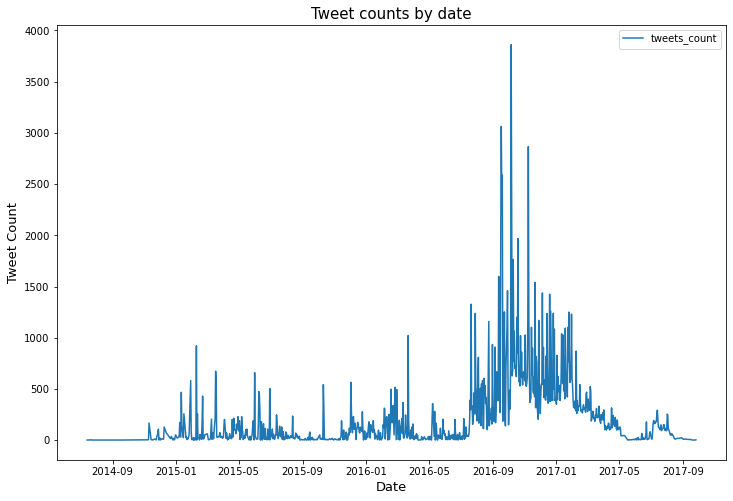

In [119]:
tweet_trend.plot(figsize = (12,8))
plt.title('Tweet counts by date', fontsize = 15)
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Tweet Count', fontsize = 13)

In [120]:
### Lets Analyse If these tweets really had to impact the way of the US presidential elections, these tweets would be most 
### numerous during important parts of the trump rally or milestones in the trump rally.

In [121]:
### Let's get these dates online and try to map that data on with the line plot!


### access data from below (these are typically those dates when Triumph have certain campaign..)


### https://www.reuters.com/article/us-usa-election-timeline-factbox/timeline-pivotal-moments-in-trumps-presidential-campaign-idUSKBN1341FJ

In [122]:
dates_list = ['2015-06-16', '2015-12-07', '2016-02-01',
              '2016-03-01', '2016-03-03', '2016-03-11',
              '2016-05-03', '2016-05-26', '2016-06-20', 
              '2016-07-15', '2016-07-21', '2016-08-17',
              '2016-09-01', '2016-10-07', '2016-11-08']

# create a series of these dates.
important_dates = pd.Series(dates_list)
important_dates

0     2015-06-16
1     2015-12-07
2     2016-02-01
3     2016-03-01
4     2016-03-03
5     2016-03-11
6     2016-05-03
7     2016-05-26
8     2016-06-20
9     2016-07-15
10    2016-07-21
11    2016-08-17
12    2016-09-01
13    2016-10-07
14    2016-11-08
dtype: object

In [123]:
data=tweet_trend.copy()

In [124]:
tweet_trend.shape

(930, 1)

In [125]:
data.head(2)

,tweets_count
2014-07-14,1
2014-07-17,1


In [126]:
data2=data.copy()

In [127]:
### lets insert a col_name as Important_events holds all values as False
### ways to do it.

## 1.. define a column & just assign value

    ## below will be part of practice problems-
## 2..store all the values in some data structure like list , & then insert that list in a dataframe..
## 3..using in-built pd.insert() function as well

### 1..insert a Feature as  Important_events which holds all values as False ie..define a column & just assign value


In [128]:
# add columns to identify important events, and mark  0 or 1.
data['Important Events'] = False


In [129]:
data.head(1)

,tweets_count,Important Events
2014-07-14,1,False


### 2..insert a Feature as Important_events which holds all values as False ie.. store all the values in some data structure like list , & then insert that list in a dataframe..

In [130]:
values=[False for i in range(930)]
data2['Imp_Events'] = values

In [131]:
data2.head(2)

,tweets_count,Imp_Events
2014-07-14,1,False
2014-07-17,1,False


### 3..insert a Feature as Important_events which holds all values as False using in-built pd.insert() function as well

In [132]:
data2.insert(2, "imp_events_2", "False")

In [133]:
data2.head(1)

,tweets_count,Imp_Events,imp_events_2
2014-07-14,1,False,False


In [134]:
### lets assign True to those observations in Important_events feature , if it belongs to important dates..

## ways to do it--
## 1.np.where()
## 2.using .loc ie (pandas.DataFrame.loc)-->> which is a property 
    


In [135]:
dt=data.copy()

### 1.using np.where()

In [136]:
data.head(3)

,tweets_count,Important Events
2014-07-14,1,False
2014-07-17,1,False
2014-07-20,2,False


In [137]:
data['Important Events'].unique()

array([False])

In [138]:
important_dates

0     2015-06-16
1     2015-12-07
2     2016-02-01
3     2016-03-01
4     2016-03-03
5     2016-03-11
6     2016-05-03
7     2016-05-26
8     2016-06-20
9     2016-07-15
10    2016-07-21
11    2016-08-17
12    2016-09-01
13    2016-10-07
14    2016-11-08
dtype: object

In [139]:
data=data.reset_index().rename(columns={'index':'date'})

In [140]:
data.head(2)

,date,tweets_count,Important Events
0,2014-07-14,1,False
1,2014-07-17,1,False


In [42]:
data.dtypes

date                object
tweets_count         int64
Important Events      bool
dtype: object

In [43]:
data['date'][0]

datetime.date(2014, 7, 14)

In [44]:
important_dates[0]

'2015-06-16'

In [45]:
import datetime

In [46]:
data[data['date']==datetime.date(2014, 7, 14)]

,date,tweets_count,Important Events
0,2014-07-14,1,False


In [47]:
data[data['date'].isin(dates_list)]


### we are not getting any observations , it means there are some issues with our data..
### lets try to figure out.

,date,tweets_count,Important Events


In [48]:
### so it means we have make both series(data['date'] & important_dates) on same scale
## ie both must be either date-time object or string

## so lets try to convert date-time object into string object using in-built strftime func of date-time module

In [ ]:
### lets try to convert data['date'] into string object..

In [49]:
import datetime
data['date']=data['date'].apply(lambda x:x.strftime('%Y-%m-%d'))


In [50]:
important_dates[0]

'2015-06-16'

In [51]:
data['date'][0]

'2014-07-14'

In [52]:
data[data['date'].isin(dates_list)]

,date,tweets_count,Important Events
170,2015-06-16,3,False
331,2015-12-07,219,False
382,2016-02-01,18,False
409,2016-03-01,143,False
411,2016-03-03,6,False
419,2016-03-11,64,False
467,2016-05-03,38,False
487,2016-05-26,6,False
511,2016-06-20,201,False
536,2016-07-15,47,False


In [53]:
data['Important Events']=np.where(data['date'].isin(dates_list),True,False)

In [54]:
data[data['Important Events']==True]

,date,tweets_count,Important Events
170,2015-06-16,3,True
331,2015-12-07,219,True
382,2016-02-01,18,True
409,2016-03-01,143,True
411,2016-03-03,6,True
419,2016-03-11,64,True
467,2016-05-03,38,True
487,2016-05-26,6,True
511,2016-06-20,201,True
536,2016-07-15,47,True


In [55]:
data['Important Events'].unique()

array([False,  True])

#### 2.using .loc ie (pandas.DataFrame.loc)-->> which is a property of Dataframe

In [56]:
dt.head(1)

,tweets_count,Important Events
2014-07-14,1,False


In [57]:
dt['Important Events'].unique()

array([False])

In [58]:
## it means if important dates lies in index of dt dataframe , assgn as True to those observations in Important_events feature..

dt.loc[pd.to_datetime(important_dates), 'Important Events'] = True

In [59]:
dt[dt['Important Events']==True]

,tweets_count,Important Events
2015-06-16,3,True
2015-12-07,219,True
2016-02-01,18,True
2016-03-01,143,True
2016-03-03,6,True
2016-03-11,64,True
2016-05-03,38,True
2016-05-26,6,True
2016-06-20,201,True
2016-07-15,47,True


In [60]:
## lets create one more feature as values , & assign 1 in that feature if it is a important date

In [61]:
### ways to do this..

# 1..using np.where()
# 2..using own logics(for loop)
# 3..using .loc property of dataframe..

### 1..using np.where() to assign 1 & 0 in a dataframe..

In [62]:
data['values']=np.where(data['date'].isin(important_dates),1,0)

### 2..using own logics(for loop)

In [63]:
values_d_list=[]
for date in data['date']:
    if date in important_dates.values:
        values_d_list.append(1)
    else:
        values_d_list.append(0)

In [64]:
data['values']=values_d_list

### 3..using .loc property of dataframe..

In [65]:
dt['values'] = np.zeros(930,dtype=int)

In [66]:
dt.head()

,tweets_count,Important Events,values
2014-07-14,1,False,0
2014-07-17,1,False,0
2014-07-20,2,False,0
2014-07-22,3,False,0
2014-07-23,1,False,0


In [67]:
dt.loc[pd.to_datetime(important_dates), 'values'] = 1

In [68]:
dt['values'].unique()

array([0, 1])

In [69]:
dt['values'].nunique()

2

In [70]:
# plot the line chart for trend, a monthly average of tweet counts and add red dots to mark important events.

In [71]:
filt=data['Important Events'] == True
data[data['Important Events'] == True]['date'].values

## dt[dt['Important Events'] == True].index.values (in assignment)

array(['2015-06-16', '2015-12-07', '2016-02-01', '2016-03-01',
       '2016-03-03', '2016-03-11', '2016-05-03', '2016-05-26',
       '2016-06-20', '2016-07-15', '2016-07-21', '2016-08-17',
       '2016-09-01', '2016-10-07', '2016-11-08'], dtype=object)

In [72]:
data.head(2)

,date,tweets_count,Important Events,values
0,2014-07-14,1,False,0
1,2014-07-17,1,False,0


In [73]:
filt=data['Important Events'] == True
filt

0      False
1      False
2      False
3      False
4      False
       ...  
925    False
926    False
927    False
928    False
929    False
Name: Important Events, Length: 930, dtype: bool

In [74]:
data[filt]['date'].values

array(['2015-06-16', '2015-12-07', '2016-02-01', '2016-03-01',
       '2016-03-03', '2016-03-11', '2016-05-03', '2016-05-26',
       '2016-06-20', '2016-07-15', '2016-07-21', '2016-08-17',
       '2016-09-01', '2016-10-07', '2016-11-08'], dtype=object)

In [75]:
filt=data['Important Events'] == True

In [76]:
data[filt].set_index('date')['values']

date
2015-06-16    1
2015-12-07    1
2016-02-01    1
2016-03-01    1
2016-03-03    1
2016-03-11    1
2016-05-03    1
2016-05-26    1
2016-06-20    1
2016-07-15    1
2016-07-21    1
2016-08-17    1
2016-09-01    1
2016-10-07    1
2016-11-08    1
Name: values, dtype: int64

### Analyse Tweets counts by day

In [77]:
tweet_trend

,tweets_count
2014-07-14,1
2014-07-17,1
2014-07-20,2
2014-07-22,3
2014-07-23,1
...,...
2017-09-10,7
2017-09-16,6
2017-09-19,1
2017-09-24,1


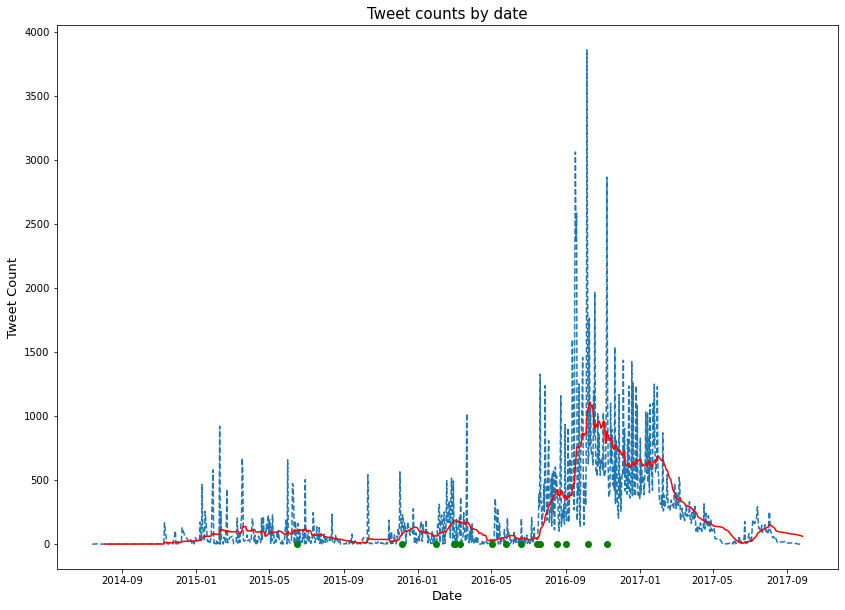

In [78]:
tweet_trend['tweets_count'].plot(linestyle = "--", 
                                label = 'Tweet Count per Day',figsize=(14,10))


# to understand trend very well , Lets add a 30 day moving average on top to view the trend! Min_periods tells rolling() to 
# use 10 points if 30 not available!
tweet_trend['tweets_count'].rolling(window = 30, min_periods = 10).mean().plot(color='r')
plt.title('Tweet counts by date', fontsize = 15)
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Tweet Count', fontsize = 13)



# plot dots for where values in the tweet_trend df are 1
filter=data['Important Events'] == True

## plt.plot(x,y,marker='o',color='g',linestyle='none',label = 'Important Dates in campaign')

plt.plot(pd.to_datetime(data[filter]['date'].values),
         data[filter].set_index('date')['values'],
         marker = 'o', 
         color = 'g',
         ## to disable your linestyle , set it as none
         linestyle='none',
        label = 'Important Dates in campaign')

#### The US president was elected on 8th November 2016 - the last greendot on the chart. We see a lot of tweet activity near the end of his campaign.

### lets Analyse the percentage change in tweet counts between subsequent dates and then see if an important date relates with a spike or not ?

In [79]:
### ways to find percentage data..
# 1..using pandas pct_change()
# 2..by shifting the values & doing pre-processing

### 1..using pandas pct_change() to find out percentage change within feature

In [80]:
data['tweets_count']

0      1
1      1
2      2
3      3
4      1
      ..
925    7
926    6
927    1
928    1
929    3
Name: tweets_count, Length: 930, dtype: int64

In [81]:
# Calculate the percentage change in tweet counts
data['tweets_count'].pct_change()*100

0             NaN
1        0.000000
2      100.000000
3       50.000000
4      -66.666667
          ...    
925    -36.363636
926    -14.285714
927    -83.333333
928      0.000000
929    200.000000
Name: tweets_count, Length: 930, dtype: float64

In [82]:
data['pct_change']=data['tweets_count'].pct_change()*100

In [83]:
### so lets extract data with respect to important dates only 

In [84]:
data[filter].set_index('date')[['tweets_count','pct_change']]

,tweets_count,pct_change
date,,
2015-06-16,3,50.000000
2015-12-07,219,204.166667
2016-02-01,18,1700.000000
2016-03-01,143,-71.052632
2016-03-03,6,-92.105263
2016-03-11,64,-69.523810
2016-05-03,38,216.666667
2016-05-26,6,-50.000000
2016-06-20,201,1156.250000


### 2..by shifting the values & doing pre-processing just to find out percentage change within feature..

In [85]:
data['tweets_count']

0      1
1      1
2      2
3      3
4      1
      ..
925    7
926    6
927    1
928    1
929    3
Name: tweets_count, Length: 930, dtype: int64

In [86]:
((data['tweets_count'].shift(1)-data['tweets_count'])/data['tweets_count'].shift(1))*100

0             NaN
1        0.000000
2     -100.000000
3      -50.000000
4       66.666667
          ...    
925     36.363636
926     14.285714
927     83.333333
928      0.000000
929   -200.000000
Name: tweets_count, Length: 930, dtype: float64

In [87]:
data['tweets_count'].pct_change()*100

0             NaN
1        0.000000
2      100.000000
3       50.000000
4      -66.666667
          ...    
925    -36.363636
926    -14.285714
927    -83.333333
928      0.000000
929    200.000000
Name: tweets_count, Length: 930, dtype: float64

In [88]:
#### now lets check whether date is in date-time nature or not

In [89]:
data.dtypes

date                 object
tweets_count          int64
Important Events       bool
values                int64
pct_change          float64
dtype: object

In [90]:
data['date'][0]

'2014-07-14'

In [91]:
data['date']=pd.to_datetime(data['date'])

In [92]:
data.set_index('date')['pct_change']

date
2014-07-14           NaN
2014-07-17      0.000000
2014-07-20    100.000000
2014-07-22     50.000000
2014-07-23    -66.666667
                 ...    
2017-09-10    -36.363636
2017-09-16    -14.285714
2017-09-19    -83.333333
2017-09-24      0.000000
2017-09-26    200.000000
Name: pct_change, Length: 930, dtype: float64

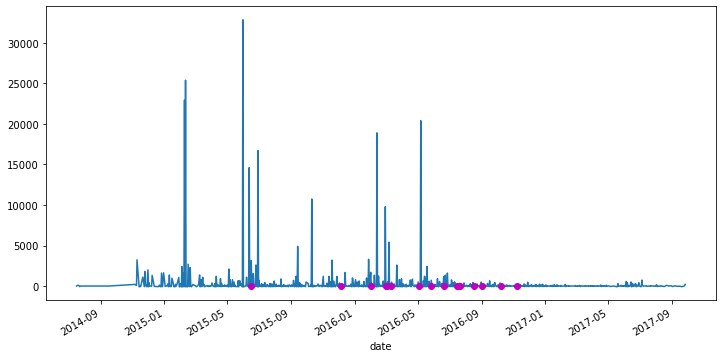

In [93]:
plt.figure(figsize=(12,6))
data.set_index('date')['pct_change'].plot()

## on top of this visualisation , lets map our important events points...

filter=data['Important Events'] == True
plt.plot(pd.to_datetime(data[filter]['date'].values),
         data[filter].set_index('date')['values'],
         marker = 'o', 
         color = 'm',
         ## to disable your linestyle , set it as none
         linestyle='none',
        label = 'Important Dates in campaign')

In [94]:
troll.to_csv(r'F:\Data Analysis_projects\Russian_tweets\Updated_Data/tweets_updated1.csv',index=False)